In [6]:
import ast

import numpy as np
import tensorflow as tf
import re
import time

from docutils.parsers.rst import states


In [2]:
lines = open("movie_lines.txt", encoding="utf-8", errors="ignore").read().split('\n')
lines

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?',
 'L868 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ The "real you".',
 'L867 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ What good stuff?',
 "L866 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ I figured yo

In [3]:
conversations = open("movie_conversations.txt", encoding="utf-8", errors="ignore").read().split('\n')
conversations

["u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L363', 'L364']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L365', 'L366']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L367', 'L368']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L401', 'L402', 'L403']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L404', 'L405', 'L406', 'L407']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L575', 'L576']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L577', 'L578']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L662', 'L663']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L693', 'L69

Data preprocessing

In [4]:
id2line = {}

for line in lines:
    _line = line.split(" +++$+++ ")
    if len(_line) == 5:
        id2line[_line[0]] = _line[-1]


id2line

{'L1045': 'They do not!',
 'L1044': 'They do to!',
 'L985': 'I hope so.',
 'L984': 'She okay?',
 'L925': "Let's go.",
 'L924': 'Wow',
 'L872': "Okay -- you're gonna need to learn how to lie.",
 'L871': 'No',
 'L870': 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869': 'Like my fear of wearing pastels?',
 'L868': 'The "real you".',
 'L867': 'What good stuff?',
 'L866': "I figured you'd get to the good stuff eventually.",
 'L865': 'Thank God!  If I had to hear one more story about your coiffure...',
 'L864': "Me.  This endless ...blonde babble. I'm like, boring myself.",
 'L863': 'What crap?',
 'L862': 'do you listen to this crap?',
 'L861': 'No...',
 'L860': 'Then Guillermo says, "If you go any lighter, you\'re gonna look like an extra on 90210."',
 'L699': 'You always been this selfish?',
 'L698': 'But',
 'L697': "Then that's all you had to say.",
 'L696': 'Well, no...',
 'L695': "You never wanted to go out with 'me, did y

In [9]:
conversations_ids = []

for conversation in conversations[:-1]:
    _conversation = ast.literal_eval(conversation.split(" +++$+++ ")[-1])
    conversations_ids.append(_conversation)

conversations_ids

[['L194', 'L195', 'L196', 'L197'],
 ['L198', 'L199'],
 ['L200', 'L201', 'L202', 'L203'],
 ['L204', 'L205', 'L206'],
 ['L207', 'L208'],
 ['L271', 'L272', 'L273', 'L274', 'L275'],
 ['L276', 'L277'],
 ['L280', 'L281'],
 ['L363', 'L364'],
 ['L365', 'L366'],
 ['L367', 'L368'],
 ['L401', 'L402', 'L403'],
 ['L404', 'L405', 'L406', 'L407'],
 ['L575', 'L576'],
 ['L577', 'L578'],
 ['L662', 'L663'],
 ['L693', 'L694', 'L695'],
 ['L696', 'L697', 'L698', 'L699'],
 ['L860', 'L861'],
 ['L862', 'L863', 'L864', 'L865'],
 ['L866', 'L867', 'L868', 'L869'],
 ['L870', 'L871', 'L872'],
 ['L924', 'L925'],
 ['L984', 'L985'],
 ['L1044', 'L1045'],
 ['L49', 'L50', 'L51'],
 ['L571', 'L572', 'L573'],
 ['L579', 'L580'],
 ['L595', 'L596', 'L597'],
 ['L598', 'L599', 'L600'],
 ['L659', 'L660'],
 ['L952', 'L953'],
 ['L394', 'L395'],
 ['L396', 'L397'],
 ['L589', 'L590', 'L591'],
 ['L592', 'L593'],
 ['L756', 'L757', 'L758'],
 ['L759', 'L760'],
 ['L164', 'L165'],
 ['L319', 'L320'],
 ['L441', 'L442', 'L443', 'L444', 'L445']

In [14]:
questions = []
answers = []

for conversation in conversations_ids:
    for i in range(len(conversation) - 1):
        questions.append(id2line[conversation[i]])
        answers.append(id2line[conversation[i + 1]])

print(questions[:2])
print(answers[:2])

['Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.', "Well, I thought we'd start with pronunciation, if that's okay with you."]
["Well, I thought we'd start with pronunciation, if that's okay with you.", 'Not the hacking and gagging and spitting part.  Please.']


In [29]:
# Cleaning text

def clean_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    # text = re.sub(r"'s", " is", text)

    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"[-()\"#/@;:<>{}+=~|.?,]", "", text)
    return text


In [30]:
clean_questions = [clean_text(e) for e in questions]
clean_answers = [clean_text(e) for e in answers]


In [31]:
clean_questions

['can we make this quick  roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad  again',
 "well i thought we would start with pronunciation if that's okay with you",
 'not the hacking and gagging and spitting part  please',
 "you are asking me out  that's so cute what is your name again",
 "no no it's my fault  we didn't have a proper introduction ",
 'cameron',
 'the thing is cameron  i am at the mercy of a particularly hideous breed of loser  my sister  i cannot date until she does',
 'why',
 'unsolved mystery  she used to be really popular when she started high school then it was just like she got sick of it or something',
 'gosh if only we could find kat a boyfriend',
 "c'esc ma tete this is my head",
 'right  see  you are ready for the quiz',
 "i don't want to know how to say that though  i want to know useful things like where the good stores are  how much does champagne cost  stuff like chat  i have never in my life had to point out m

In [41]:
word2count = {}

for question in clean_questions:
    for word in question.split():
        if word in word2count:
            word2count[word] += 1
        else:
            word2count[word] = 1

for answer in clean_answers:
    for word in answer.split():
        if word in word2count:
            word2count[word] += 1
        else:
            word2count[word] = 1

In [42]:
i = 0
for e in sorted(word2count, key=lambda x: word2count[x], reverse=True):
    if i == 10:
        break
    print(i, e, word2count[e])
    i += 1

0 you 212942
1 i 204535
2 the 140644
3 to 116121
4 a 102010
5 it 67375
6 and 65607
7 is 63444
8 of 56296
9 what 55199


In [43]:
i = 0
for e in sorted(word2count, key=lambda x: word2count[x]):
    if i == 10:
        break
    print(i, e, word2count[e])
    i += 1

0 roxanne 1
1 korrine 1
2 c'esc 1
3 tete 1
4 guillermo 1
5 90210 1
6 bonchowski 1
7 dooropening 1
8 coatholding 1
9 lowenbrau's 1


In [61]:
sorted_word2count = sorted(word2count, key=lambda x: word2count[x], reverse=True)
sorted_word2count[:10]

['you', 'i', 'the', 'to', 'a', 'it', 'and', 'is', 'of', 'what']

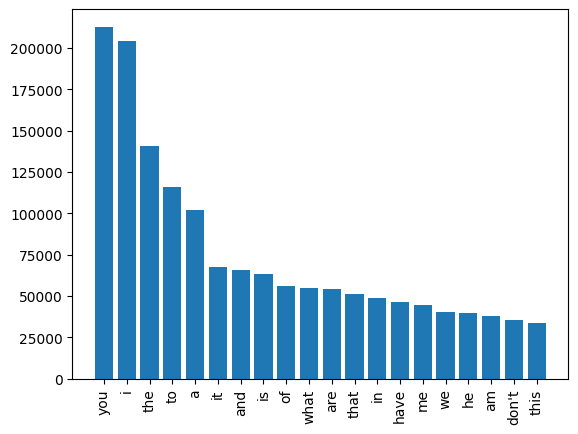

In [60]:
import matplotlib.pyplot as plt

n_words = 20
plt.bar(sorted_word2count[:n_words], [word2count[e] for e in sorted_word2count[:n_words]])
plt.xticks(rotation=90)
plt.show()

In [164]:
threshold = 15

In [165]:
print(f"% of words that it's count is less than {threshold}")
print(100 * len([e for e in word2count if word2count[e] <= threshold]) / len(word2count))
print(f"% of words that it's count is greater than {threshold}")
print(100 * len([e for e in word2count if word2count[e] >= threshold]) / len(word2count))


% of words that it's count is less than 15
86.44271773539492
% of words that it's count is greater than 15
14.193025141930251


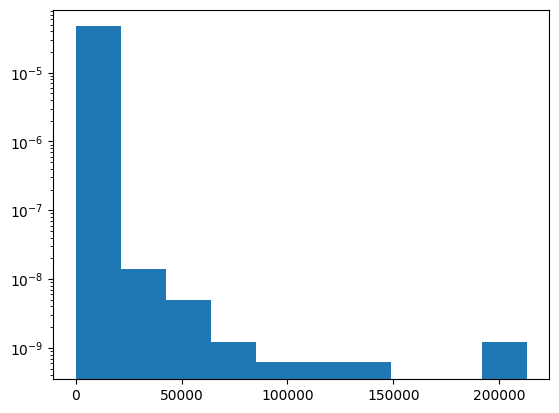

In [163]:
plt.hist(word2count.values(), density=True, log=True)
# plt.xscale('log')
plt.show()

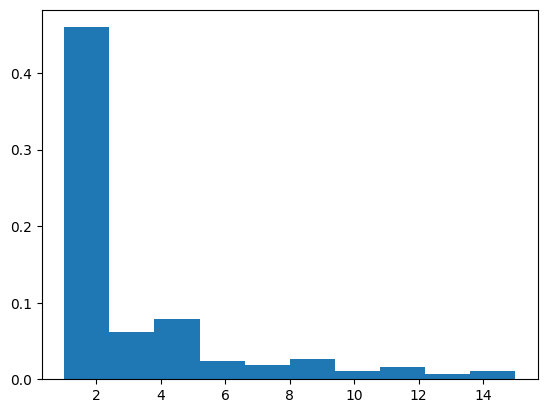

In [161]:
plt.hist([e for e in word2count.values() if e <= threshold], density=True, log=False)
# plt.xscale('log')
plt.show()

In [173]:
word2int = {}
word_number = 0

for word, count in word2count.items():
    if count >= threshold:
        word2int[word] = word_number
        word_number += 1

In [180]:
tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
for token in tokens:
    word2int[token] = len(word2int) + 1


In [182]:
int2word = dict(zip(word2int.values(), word2int.keys()))
int2word

{0: 'can',
 1: 'we',
 2: 'make',
 3: 'this',
 4: 'quick',
 5: 'and',
 6: 'andrew',
 7: 'barrett',
 8: 'are',
 9: 'having',
 10: 'an',
 11: 'incredibly',
 12: 'public',
 13: 'break',
 14: 'up',
 15: 'on',
 16: 'the',
 17: 'again',
 18: 'well',
 19: 'i',
 20: 'thought',
 21: 'would',
 22: 'start',
 23: 'with',
 24: 'if',
 25: "that's",
 26: 'okay',
 27: 'you',
 28: 'not',
 29: 'hacking',
 30: 'spitting',
 31: 'part',
 32: 'please',
 33: 'asking',
 34: 'me',
 35: 'out',
 36: 'so',
 37: 'cute',
 38: 'what',
 39: 'is',
 40: 'your',
 41: 'name',
 42: 'no',
 43: "it's",
 44: 'my',
 45: 'fault',
 46: "didn't",
 47: 'have',
 48: 'a',
 49: 'proper',
 50: 'introduction',
 51: 'cameron',
 52: 'thing',
 53: 'am',
 54: 'at',
 55: 'mercy',
 56: 'of',
 57: 'particularly',
 58: 'hideous',
 59: 'breed',
 60: 'loser',
 61: 'sister',
 62: 'cannot',
 63: 'date',
 64: 'until',
 65: 'she',
 66: 'does',
 67: 'why',
 68: 'unsolved',
 69: 'mystery',
 70: 'used',
 71: 'to',
 72: 'be',
 73: 'really',
 74: 'popula

In [183]:
for i in range(len(clean_answers)):
    clean_answers[i] += ' <EOS>'


In [198]:
questions_to_int = []
answers_to_int = []

for question in clean_questions:
    ints = []
    for word in question.split():
        ints.append(word2int[word if word in word2int else '<OUT>'])
    questions_to_int.append(ints)

for answer in clean_answers:
    ints = []
    for word in answer.split():
        ints.append(word2int[word if word in word2int else '<OUT>'])
    answers_to_int.append(ints)

questions_to_int

[[0,
  1,
  2,
  3,
  4,
  10855,
  10855,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  10855,
  12,
  13,
  14,
  15,
  16,
  10855,
  17],
 [18, 19, 20, 1, 21, 22, 23, 10855, 24, 25, 26, 23, 27],
 [28, 16, 29, 5, 10855, 5, 30, 31, 32],
 [27, 8, 33, 34, 35, 25, 36, 37, 38, 39, 40, 41, 17],
 [42, 42, 43, 44, 45, 1, 46, 47, 48, 49, 50],
 [51],
 [16,
  52,
  39,
  51,
  19,
  53,
  54,
  16,
  55,
  56,
  48,
  57,
  58,
  59,
  56,
  60,
  44,
  61,
  19,
  62,
  63,
  64,
  65,
  66],
 [67],
 [68,
  69,
  65,
  70,
  71,
  72,
  73,
  74,
  75,
  65,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  65,
  84,
  85,
  56,
  80,
  86,
  87],
 [88, 24, 89, 1, 90, 91, 92, 48, 93],
 [10855, 94, 10855, 3, 39, 44, 95],
 [96, 97, 27, 8, 98, 99, 16, 10855],
 [19,
  100,
  101,
  71,
  102,
  103,
  71,
  104,
  105,
  106,
  19,
  101,
  71,
  102,
  107,
  108,
  83,
  109,
  16,
  110,
  111,
  8,
  103,
  112,
  66,
  113,
  114,
  115,
  83,
  116,
  19,
  47,
  117,
  118,
  44,
  119,
  120,
  

In [200]:
sorted_clean_questions = []
sorted_clean_answers = []

# 25 is the max length we want
for length in range(1, 26):
    for i, e in enumerate(questions_to_int):
        if len(e) == length:
            sorted_clean_questions.append(e)
            sorted_clean_answers.append(e)

sorted_clean_questions[:5]

[[51], [67], [130], [155], [142]]

Building SEQ2SEQ model

In [202]:
def model_input():
    inputs = tf.compat.v1.placeholder(tf.int32, [None, None], name='input')
    targets = tf.compat.v1.placeholder(tf.int32, [None, None], name='target')
    lr = tf.compat.v1.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.compat.v1.placeholder(tf.float32, name='keep_prob')  # control dropout rate
    return inputs, targets, lr, keep_prob

In [211]:
def preprocess_targets(targets, word2int, batch_size):
    left_side = tf.fill([batch_size, 1], word2int['<SOS>'])
    right_side = tf.strided_slice(targets, [0, 0], [batch_size, -1], [1, 1])
    return tf.concat([left_side, right_side], 1)



In [223]:
# l = tf.fill([3, 1], 23)
# r = tf.strided_slice(np.eye(3).astype(int), [0, 0], [3, -1], [1, 1])
#
# tf.concat([l, r], 1)

In [ ]:
def encoder_rnn_layer(rnn_inputs, rnn_size, num_layers, keep_prob, sequence_length):
    lstm = tf.keras.layers.LSTMCell(rnn_size)
    lstm_dropout = tf.compat.v1.nn.rnn_cell.DropoutWrapper(lstm, input_keep_prob=keep_prob)




In [296]:
# lstm = tf.keras.models.Sequential(
#     tf.keras.layers.LSTM(units=1, input_shape=(5, 5))
# )
# lstm.build()
# X = np.random.normal(0, 1, (2, 5, 5))
# print(X)
# print(lstm(X))
# # print(lstm.summary())

